#### Sentiment Analysis on 10 car models. Each row is a a post on the forum, and the scores represent the sentiment towards a model in that post. Some posts mention many cars, others only mention one. Neutral/zero sentiment is not indicated in this dataset.  

In [1]:
import csv
import pandas as pd
import numpy as np
import networkx as nx

In [2]:
#Read in sentiment scores csv and view to make sure the data looks okay
sent_scores = pd.read_csv('Sentiment Scores.csv')
sent_scores[:5]

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [3]:
#As shown below, the sentiment scores range from -5 to +5
#There are many missing values in the 488 row dataset
sent_scores.describe()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
count,70.000000,319.000000,58.000000,167.000000,43.000000,29.000000,29.000000,101.000000,37.000000,233.000000
mean,1.371429,1.247649,1.810345,1.233533,1.023256,1.172414,0.724138,1.029703,1.513514,0.965665
std,1.934968,2.046193,1.858663,2.099759,2.230614,2.001231,1.709147,2.156179,1.980763,2.054983
min,-3.000000,-5.000000,-3.000000,-4.000000,-3.000000,-2.000000,-2.000000,-5.000000,-3.000000,-4.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000


In [4]:
import string
import plotly.plotly as py
import plotly.graph_objs as go

data = []

for col in sent_scores.columns:
    data.append(go.Box(y = sent_scores[col], name = col, showlegend = False))

data.append(go.Scatter(x = sent_scores.columns, y = sent_scores.mean(), mode = 'lines', name = 'mean'))

#This plotly boxplot visualizes quintiles and outliers of the cars' sentiments
#Hovering over any of the boxplot gives interactive information on the variable, which is more user-friendly that the describe function above.
py.iplot(data, filename = 'sent-scores-box-plot')

#url = py.plot(data, filename='sent-scores-box-plot')

In [5]:
from itertools import permutations

#Using itertools to create every possible 2 unit permutation of the cars

car_per = []
for i in permutations(sent_scores.columns.values, 2):
    car_per.append(i)
    
len(car_per)

90

In [6]:
car_per[:5]

[('ES', 'LS'), ('ES', 'RX'), ('ES', 'A8'), ('ES', 'A6'), ('ES', '3series')]

In [7]:
#Making a column for every permutation as the difference between car1 and car2

for per in car_per:
    car1 = per[0]
    car2 = per[1]
    sent_scores[car1+"-"+car2] = sent_scores[car1] - sent_scores[car2]

sent_scores[:5]

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass,...,XJ-Sclass,Sclass-ES,Sclass-LS,Sclass-RX,Sclass-A8,Sclass-A6,Sclass-3series,Sclass-5series,Sclass-7series,Sclass-XJ
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0,...,1.0,NaN,NaN,-3.0,-2.0,NaN,NaN,NaN,-4.0,-1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0,...,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0,...,2.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,-2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [8]:
#Defining a funtion to replace 0 and negative values with a nan
def positive(x):
    if x>0:
        return(x)
    return(np.nan)

In [9]:
#For every permutation, getting rid of the negative values and then taking the mean so each 
sum_list = []
for item in sent_scores.columns.values:
    sum_list.append([item, sent_scores[item].map(positive).mean()])

In [10]:
sum_list = sum_list[10:] # for all the permutations
sum_list 

[['ES-LS', 1.1666666666666667],
 ['ES-RX', 1.6666666666666667],
 ['ES-A8', 3.4],
 ['ES-A6', 6.0],
 ['ES-3series', 3.25],
 ['ES-5series', 4.0],
 ['ES-7series', 3.6],
 ['ES-XJ', 1.0],
 ['ES-Sclass', 3.2857142857142856],
 ['LS-ES', 2.0],
 ['LS-RX', 3.4],
 ['LS-A8', 2.857142857142857],
 ['LS-A6', 3.3333333333333335],
 ['LS-3series', 2.8],
 ['LS-5series', 2.7],
 ['LS-7series', 2.642857142857143],
 ['LS-XJ', 2.75],
 ['LS-Sclass', 2.554054054054054],
 ['RX-ES', 2.0],
 ['RX-LS', 1.1428571428571428],
 ['RX-A8', 2.2],
 ['RX-A6', 3.6666666666666665],
 ['RX-3series', 4.0],
 ['RX-5series', 3.6],
 ['RX-7series', 3.75],
 ['RX-XJ', 2.0],
 ['RX-Sclass', 3.6363636363636362],
 ['A8-ES', 3.0],
 ['A8-LS', 2.8378378378378377],
 ['A8-RX', 1.0],
 ['A8-A6', 1.375],
 ['A8-3series', 3.25],
 ['A8-5series', 3.3333333333333335],
 ['A8-7series', 2.1818181818181817],
 ['A8-XJ', 2.0],
 ['A8-Sclass', 2.5],
 ['A6-ES', 1.6666666666666667],
 ['A6-LS', 1.2857142857142858],
 ['A6-RX', nan],
 ['A6-A8', 3.1666666666666665],
 

In [11]:
#Getting rid of the permutations that have a nan value
sum_list_drop_na = []
for item in sum_list:
    if item[1] > 0:
        sum_list_drop_na.append(item)
sum_list = sum_list_drop_na

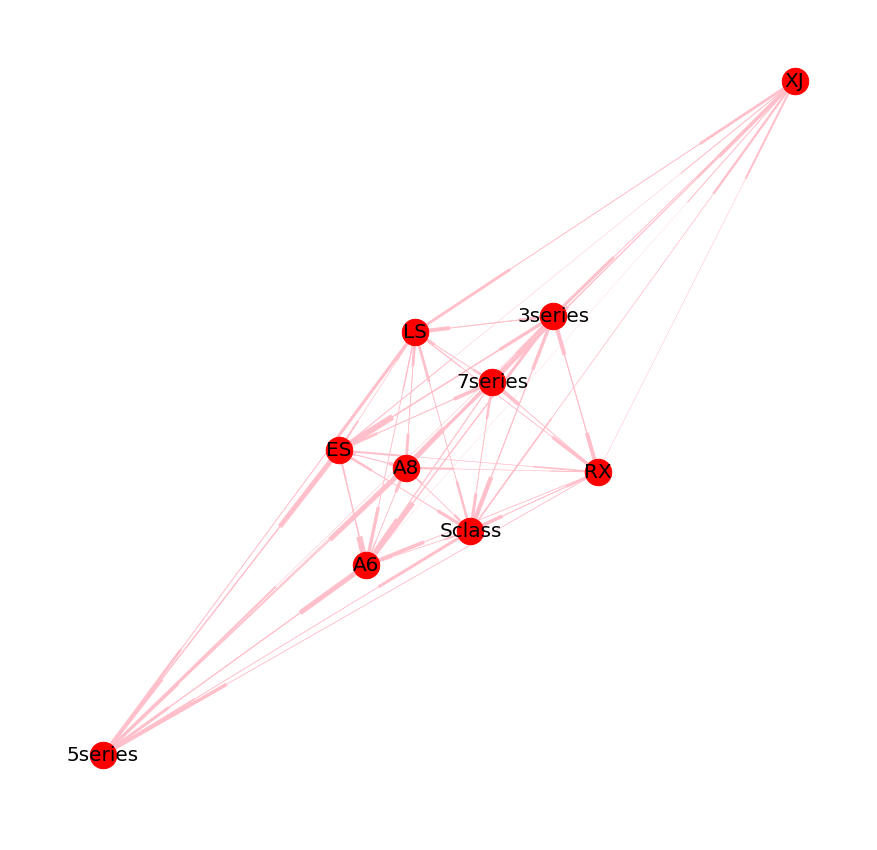

In [12]:
#Putting the values we want in with the weights
#Creating a bi-directional product comparison network using networkx

import matplotlib.pyplot as plt
%matplotlib inline
import math

G=nx.DiGraph()

plt.figure(figsize=(15,15))
for item in sum_list:
    cars = item[0]
    w = item[1]
    cars = cars.split('-')
    G.add_edge(cars[0], cars[1], weight=w)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) ]

#positions for all nodes
pos=nx.spring_layout(G)

edges = G.edges()
weights = [(G[u][v]['weight']/4) for u,v in edges]

#nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

#edges
nx.draw_networkx_edges(G,pos,edgelist=elarge, width=weights, edge_color='pink')

#adding the car labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off');

#every time the code is run, the 2D visualization looks different even though the relationships and weights do not change

#### Calculateing the unweighted and weighted PageRank scores for each car, and finding the correlations between these metrics and sales figures.

In [13]:
wt_pg = nx.pagerank(G, weight = 'weight')
uwt_pg = nx.pagerank(G, weight = None)

In [14]:
wt_pg

{'3series': 0.11129255498726288,
 '5series': 0.10043224143092712,
 '7series': 0.09882251654731958,
 'A6': 0.11999385874541488,
 'A8': 0.12128405916443198,
 'ES': 0.1107606787321283,
 'LS': 0.09763364495637523,
 'RX': 0.0619090083830645,
 'Sclass': 0.10784305016515526,
 'XJ': 0.07002838688792054}

In [15]:
uwt_pg

{'3series': 0.09625372542400575,
 '5series': 0.09625372542400575,
 '7series': 0.10008939245793994,
 'A6': 0.09911949075596412,
 'A8': 0.1110864444513413,
 'ES': 0.1110864444513413,
 'LS': 0.11108644445134132,
 'RX': 0.07810674411146784,
 'Sclass': 0.1110864444513413,
 'XJ': 0.08583114402125112}

In [16]:
salesdf = pd.DataFrame(data = [wt_pg, uwt_pg]).T
salesdf.columns = ('weighted', 'unweighted')
salesdf

,weighted,unweighted
3series,0.111293,0.096254
5series,0.100432,0.096254
7series,0.098823,0.100089
A6,0.119994,0.099119
A8,0.121284,0.111086
ES,0.110761,0.111086
LS,0.097634,0.111086
RX,0.061909,0.078107
Sclass,0.107843,0.111086
XJ,0.070028,0.085831


In [17]:
#adding known sales volumes
salesdf["sales"] = (220000, 60000, 14000, 20000, 12000,135000, 30000, 120000, 25000, 6600)
salesdf

,weighted,unweighted,sales
3series,0.111293,0.096254,220000
5series,0.100432,0.096254,60000
7series,0.098823,0.100089,14000
A6,0.119994,0.099119,20000
A8,0.121284,0.111086,12000
ES,0.110761,0.111086,135000
LS,0.097634,0.111086,30000
RX,0.061909,0.078107,120000
Sclass,0.107843,0.111086,25000
XJ,0.070028,0.085831,6600


In [18]:
salesdf.corr()

,weighted,unweighted,sales
weighted,1.000000,0.785285,-0.003305
unweighted,0.785285,1.000000,-0.208930
sales,-0.003305,-0.208930,1.000000


## Task C. The above sentiment scores above were obtained by manually reading each post.  The file “Edmunds Reviews.xlsx” provide a bunch of actual messages (combine the worksheets). Your task is to automate the sentiment extraction from each post.  As in tasks A and B, focus on the same 10 models (note that other models may also be mentioned, but that they should be ignored).     

##  Write one or more python or R script(s) to generate sentiment scores for the 10 models just as in the sentiment scores worksheet.  This will be an unsupervised approach. Your script should extract parts of a post that pertain to a car model, and obtain its sentiment score. 


In [19]:
reviews = pd.read_excel('Edmunds Reviews.xlsx')
reviews = reviews.drop_duplicates()
reviews[:5]

,Review
0,":P I like you, Merc. You make me laugh! If Mat..."
1,I am surprised that I did not find any discuss...
3,. . .let me see if I am following along correc...
4,". . .now hold on a minute. A ""current"" A6 4.2 ..."
5,but has anyone noticed the front oh the new ac...


In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

#making every character lowercase and tokenizing the words from the reviews
tokenizer = RegexpTokenizer(r'\w+')
reviews['Tokens'] = reviews['Review'].str.lower()
reviews['Tokens'] = reviews['Tokens'].map(tokenizer.tokenize)
reviews[:5]

,Review,Tokens
0,":P I like you, Merc. You make me laugh! If Mat...","[p, i, like, you, merc, you, make, me, laugh, ..."
1,I am surprised that I did not find any discuss...,"[i, am, surprised, that, i, did, not, find, an..."
3,. . .let me see if I am following along correc...,"[let, me, see, if, i, am, following, along, co..."
4,". . .now hold on a minute. A ""current"" A6 4.2 ...","[now, hold, on, a, minute, a, current, a6, 4, ..."
5,but has anyone noticed the front oh the new ac...,"[but, has, anyone, noticed, the, front, oh, th..."


In [21]:
#identifying the set of car models in all lowercase
models = list(sent_scores.columns.values[:10])
model_set = set(list(map(lambda x:x.lower(),models)))
model_set

{'3series', '5series', '7series', 'a6', 'a8', 'es', 'ls', 'rx', 'sclass', 'xj'}

In [22]:
reviews['Intersection'] = reviews['Tokens'].map(lambda x: set(x))
reviews['Intersection'] = reviews.Intersection.map(lambda x: set.intersection(x,model_set))
reviews['Intersection'] = reviews['Intersection'].map(lambda x: list(x))

#identifying the reviews that mention the models in the previously defined set
mask = reviews['Intersection'].str.len() != 0
has_models = pd.DataFrame(reviews[mask])
has_models[:5]

,Review,Tokens,Intersection
0,":P I like you, Merc. You make me laugh! If Mat...","[p, i, like, you, merc, you, make, me, laugh, ...","[rx, ls]"
1,I am surprised that I did not find any discuss...,"[i, am, surprised, that, i, did, not, find, an...","[a8, 7series]"
3,. . .let me see if I am following along correc...,"[let, me, see, if, i, am, following, along, co...","[a6, a8]"
4,". . .now hold on a minute. A ""current"" A6 4.2 ...","[now, hold, on, a, minute, a, current, a6, 4, ...","[a6, a8]"
5,but has anyone noticed the front oh the new ac...,"[but, has, anyone, noticed, the, front, oh, th...",[a8]


In [23]:
from nltk.corpus import stopwords

stops = set(stopwords.words("english"))

#dropping stop words from the list of tokens
has_models['Tokens_nostop']= has_models['Tokens'].apply(lambda x: [item for item in x if item not in stops])
has_models

,Review,Tokens,Intersection,Tokens_nostop
0,":P I like you, Merc. You make me laugh! If Mat...","[p, i, like, you, merc, you, make, me, laugh, ...","[rx, ls]","[p, like, merc, make, laugh, matrix, laugh, ta..."
1,I am surprised that I did not find any discuss...,"[i, am, surprised, that, i, did, not, find, an...","[a8, 7series]","[surprised, find, discussionsregarding, audi, ..."
3,. . .let me see if I am following along correc...,"[let, me, see, if, i, am, following, along, co...","[a6, a8]","[let, see, following, along, correctly, 1, new..."
4,". . .now hold on a minute. A ""current"" A6 4.2 ...","[now, hold, on, a, minute, a, current, a6, 4, ...","[a6, a8]","[hold, minute, current, a6, 4, 2, fully, optio..."
5,but has anyone noticed the front oh the new ac...,"[but, has, anyone, noticed, the, front, oh, th...",[a8],"[anyone, noticed, front, oh, new, accords, es3..."
6,""""" I think in the luxury car market 10-20% is ...","[i, think, in, the, luxury, car, market, 10, 2...","[sclass, a8, 7series]","[think, luxury, car, market, 10, 20, right, va..."
8,"...cointunied from previous post...""Globally, ...","[cointunied, from, previous, post, globally, l...","[3series, 7series]","[cointunied, previous, post, globally, lexus, ..."
11,the next A8 will probably be more of a headtur...,"[the, next, a8, will, probably, be, more, of, ...","[a6, a8]","[next, a8, probably, headturner, vein, a6, tt,..."
12,"...there's no test, and truly no animosity on ...","[there, s, no, test, and, truly, no, animosity...",[sclass],"[test, truly, animosity, side, seem, impressio..."
13,"""... a car that virtually no one wants when ne...","[a, car, that, virtually, no, one, wants, when...","[sclass, a8]","[car, virtually, one, wants, new, lj, doc, get..."


In [24]:
import re
ten_words = []
length = []
comment_num = []

#extracting n-grams: the words before and after any of the set of car models for more insight
for index, row in has_models.iterrows():
    for i in row['Intersection']:
        comment_num.append(index)
        length.append(i)
        position = row['Tokens_nostop'].index(i) 
        mod_sent = row['Tokens_nostop'][(position-5):(position+6)]
        ten_words.append(mod_sent)

models_sentences = []
for i in ten_words:
    models_sentences.append(" ".join(i))

has_models['Decagrams'] = pd.Series(models_sentences)
has_models[:2]

,Review,Tokens,Intersection,Tokens_nostop,Decagrams
0,":P I like you, Merc. You make me laugh! If Mat...","[p, i, like, you, merc, you, make, me, laugh, ...","[rx, ls]","[p, like, merc, make, laugh, matrix, laugh, ta...",1997 lexuses curvy road 2003 rx competing engi...
1,I am surprised that I did not find any discuss...,"[i, am, surprised, that, i, did, not, find, an...","[a8, 7series]","[surprised, find, discussionsregarding, audi, ...",strong memorable gs macbeth original ls champa...


In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#extracting sentiment scores from the original reviews

sents = []
analyzer = SentimentIntensityAnalyzer()

for sentence in has_models['Review']:
    vs = analyzer.polarity_scores(sentence)
    sents.append(str(vs))
    
has_models['Sentiments'] = sents
has_models[:2]

,Review,Tokens,Intersection,Tokens_nostop,Decagrams,Sentiments
0,":P I like you, Merc. You make me laugh! If Mat...","[p, i, like, you, merc, you, make, me, laugh, ...","[rx, ls]","[p, like, merc, make, laugh, matrix, laugh, ta...",1997 lexuses curvy road 2003 rx competing engi...,"{'compound': 0.9952, 'neg': 0.041, 'neu': 0.77..."
1,I am surprised that I did not find any discuss...,"[i, am, surprised, that, i, did, not, find, an...","[a8, 7series]","[surprised, find, discussionsregarding, audi, ...",strong memorable gs macbeth original ls champa...,"{'compound': 0.8496, 'neg': 0.029, 'neu': 0.82..."
